In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
frame = cv2.imread('outp.jpg')

In [4]:
def show(frame):
    cv2.imshow('frame', frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
def show(images):
    size = (900, 600)
    for i, image in enumerate(images):
        window_name = f'window {i}'
        cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
        cv2.resizeWindow(window_name, *size)
        cv2.imshow(window_name, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
def find_color(image, lower, upper, color='bgr', show_image=True):
    original_image = image.copy()
    image = image.copy()

    if color == 'hsv':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    elif color == 'gray':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lower = np.array(lower)
    upper = np.array(upper)
    mask = cv2.inRange(image, lower, upper)
    if color == 'hsv':
        image[mask == 0] = [0, 0, 255]
    elif color == 'gray':
        image[mask == 0] = 0
    else:
        image[mask == 0] = [255, 255, 255]
    if color == 'hsv':
        image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    if show_image:
        show([original_image, image])
    return image

In [ ]:
show([frame])

In [ ]:
objs = find_color(frame, [0, 0, 0], [150, 150, 150], show_image=False)

In [ ]:
def binarize(image, show_image=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if show_image:
        show([image, binary])
    return binary

In [ ]:
binary = binarize(frame, True)

In [ ]:
from ultralytics import YOLO

model = YOLO('best_up.pt')
results = model.predict([frame])

bboxes = results[0].boxes
for bbox in bboxes:
    left, top, right, bottom = bbox.xyxy[0]
    cv2.rectangle(frame, (int(left), int(top)), (int(right), int(bottom)), (255, 0, 0), 2)

show([frame])

In [1]:
import cv2
import numpy as np


def draw_circle_on_click(window_name='Image', window_size=(512, 512), circle_radius=20, circle_color=(0, 255, 0),
                         circle_thickness=-1):
    # Variable to store the coordinates
    coords = []

    # Define the mouse callback function
    def mouse_callback(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            # Draw a circle at the clicked point
            cv2.circle(frame, (x, y), circle_radius, circle_color, circle_thickness)
            cv2.imshow(window_name, frame)
            # Store the coordinates
            coords.append((x, y))
            # Optionally, close the window after the first click
            cv2.destroyAllWindows()

    # Create a window and set the mouse callback
    cv2.namedWindow(window_name)
    cv2.setMouseCallback(window_name, mouse_callback)

    # Display the image and wait for a click
    cv2.imshow(window_name, frame)
    # Wait indefinitely until a key is pressed or window is closed

    if coords:
        return coords[0]
    else:
        return None



In [4]:
def binarize(image, show_image=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if show_image:
        show([image, binary])
    return binary

In [ ]:
from math import acos, sqrt


def getAngle(segment):
    a, b = segment
    dx = b.x - a.x
    dy = b.y - a.y
    return acos(sqrt(dx ** 2 + dy ** 2) / dx)

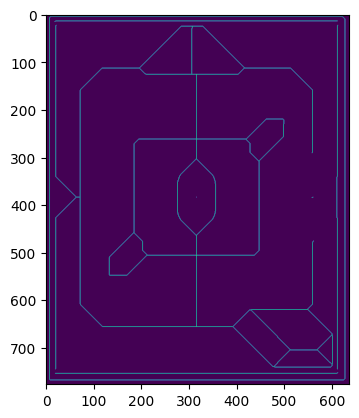

In [8]:
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

frame = cv2.imread('template.png')
frame = binarize(frame, False)
skeleton = skeletonize(frame)
skeleton = skeleton.astype(np.uint8)

plt.imshow(skeleton)